In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from numpy.linalg import inv

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
mu, sigma = 0, 1 # mean and standard deviation

In [7]:
x = np.random.normal(mu, sigma,(1000,100))
x.shape

(1000, 100)

In [8]:
beta_true = np.random.normal(mu, sigma, (100,1))
beta_true[0:10]

array([[-0.38580115],
       [-0.44944646],
       [ 1.36720423],
       [ 0.84361636],
       [ 0.37936841],
       [-0.98134661],
       [-0.49405247],
       [ 0.83931652],
       [ 0.5226187 ],
       [ 0.32737128]])

In [9]:
bias = np.random.normal(0,0.5,(1000,1))
bias[0:10]

array([[-0.86147992],
       [ 0.77394845],
       [ 0.27209212],
       [ 0.60718834],
       [-0.07492717],
       [-0.07266379],
       [-0.93327802],
       [ 1.01515578],
       [ 0.62792653],
       [-0.21837206]])

In [10]:
y = np.matmul(x,beta_true)+bias
y[0:10]

array([[-22.48321824],
       [ 16.29425916],
       [ -4.89009294],
       [  7.26944745],
       [ -7.6483696 ],
       [ -5.39979757],
       [-16.32089625],
       [-13.4258472 ],
       [ -4.97938147],
       [ -4.98367104]])

# Parte 1: Solución Cerrada

In [11]:
beta_optimo_cerrado = np.matmul(np.matmul(inv(np.matmul(x.T,x)),x.T),y)
beta_optimo_cerrado[0:10]

array([[-0.37683673],
       [-0.44921558],
       [ 1.36135741],
       [ 0.8559597 ],
       [ 0.40283096],
       [-0.98926433],
       [-0.45198209],
       [ 0.83554574],
       [ 0.51514387],
       [ 0.311865  ]])

# ¿Por que en la practica no se utiliza este metodo?

# Parte 2: GD

In [12]:
w_nulo = np.zeros((101,1))
w_nulo.shape

(101, 1)

In [13]:
def GD(ye,w,equis,tol=0.1,epochs=20,lr=0.1):
    
    unos = np.ones_like(y)
    features = np.hstack((equis,unos))
    
    nor_gradiente = 100
    i = 0 
    
    iteracion_k = []
    w_k = []
    pk = []
    norma_k = []
    
    cur_w = w
    
    while nor_gradiente > tol and i < epochs:
     
        prev_w = cur_w
        
        ## Gradiente descendente
        cur_w = cur_w - (lr * (-2 * np.matmul(features.T,ye) + 2 * np.matmul(np.matmul(features.T,features),prev_w)))
    
        ## Calculando el valor del grandiente
        gradiente = -2 * np.matmul(features.T,ye) + 2 * np.matmul(np.matmul(features.T,features),prev_w)
        
        ## Calculando la norma del gradiente         
        nor_gradiente = np.linalg.norm(gradiente)
        
        i = i+1
            
        iteracion_k.append(i)
        w_k.append(cur_w)
        pk.append(gradiente) 
        norma_k.append(nor_gradiente)

    

        #print("Iteracion: ", i)
        #print("x_inicial: ", x_inicial)
        #print("gradiente: ", gradiente)
            
    print("Norma del Gradiente: ", nor_gradiente)
    print("Forma del gradiente: ", gradiente.shape)
    
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(iteracion_k,norma_k)
    plt.show()
        
    
    TableOut = pd.DataFrame({'Iteración k':iteracion_k, 'W_k':w_k, 'Dirección': pk, 'Norma': norma_k})
    return TableOut, iteracion_k, norma_k 
    print(gradiente.shape)

Norma del Gradiente:  0.001056392781793548
Forma del gradiente:  (101, 1)


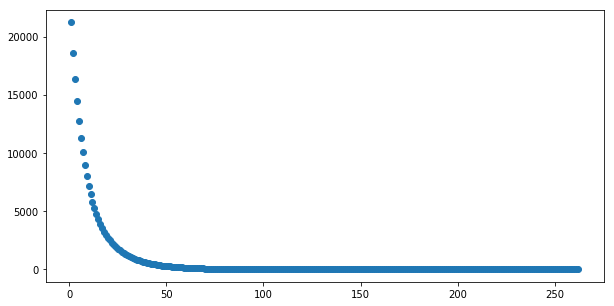

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.027961399312055928], [-0.0138797039308682...","[[559.2279862411185], [277.5940786173659], [-2...",21221.190910
1,2,"[[-0.05261801997581815], [-0.03100193934564508...","[[493.13241327524435], [342.4447082955359], [-...",18612.555706
2,3,"[[-0.07447628266804099], [-0.05030342249365589...","[[437.16525384445686], [386.02966296021606], [...",16366.956753
3,4,"[[-0.09396161500281369], [-0.07094709932970425...","[[389.70664669545397], [412.87353672096714], [...",14430.561163
4,5,"[[-0.11143106719302659], [-0.09228002904092518...","[[349.38904380425805], [426.6585942244185], [-...",12757.706753
5,6,"[[-0.127184032018033], [-0.11379864489825353],...","[[315.05929650012797], [430.3723171465671], [-...",11309.652788
6,7,"[[-0.14147134466920908], [-0.13512014136393222...","[[285.7462530235217], [426.4299293135737], [-1...",10053.523824
7,8,"[[-0.15450299919409227], [-0.15595894463535181...","[[260.63309049766406], [416.77606542839214], [...",8961.416158
8,9,"[[-0.1664546847169508], [-0.1761073977742999],...","[[239.03371045717023], [402.96906277896187], [...",8009.641274
9,10,"[[-0.17747331567998634], [-0.1954199368639582]...","[[220.37261926071056], [386.2507817931662], [-...",7178.084793


In [14]:
T_1, i_1, nor_1 = GD(y,w_nulo,x,tol=0.001102,epochs=300,lr=0.00005)
T_1

Norma del Gradiente:  0.0009256657239637902
Forma del gradiente:  (101, 1)


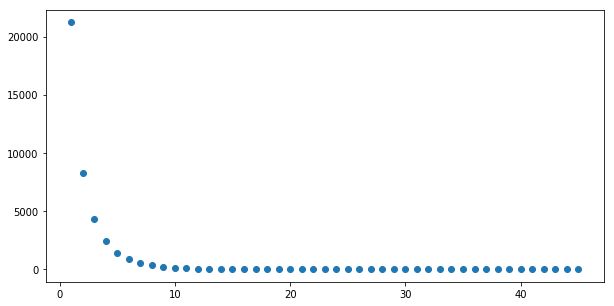

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.2796139931205593], [-0.13879703930868295]...","[[559.2279862411185], [277.5940786173659], [-2...",21221.190910
1,2,"[[-0.22875012141174764], [-0.6018472270082162]...","[[-101.72774341762329], [926.1003753990665], [...",8311.219771
2,3,"[[-0.3538290616278974], [-0.3258668124241044],...","[[250.15788043229958], [-551.9608291682237], [...",4294.307653
3,4,"[[-0.3513408638723284], [-0.5098690996622666],...","[[-4.976395511138094], [368.0045744763242], [3...",2427.938530
4,5,"[[-0.3694110982191387], [-0.4035171329515044],...","[[36.14046869362062], [-212.7039334215243], [-...",1439.557068
5,6,"[[-0.37367319694759393], [-0.4728009969483019]...","[[8.524197456910429], [138.5677279935951], [15...",881.122224
6,7,"[[-0.3731640174369172], [-0.4323539803136257],...","[[-1.0183590213534899], [-80.89403326935235], ...",552.466095
7,8,"[[-0.37685742788319315], [-0.4586085363272222]...","[[7.386820892551896], [52.50911202719294], [67...",353.230233
8,9,"[[-0.37454325122935844], [-0.4427992643330281]...","[[-4.628353307669386], [-31.618543988388296], ...",229.610181
9,10,"[[-0.37686532390758637], [-0.45308670791268196...","[[4.6441453564558515], [20.574887159307764], [...",151.413135


In [15]:
T_2, i_2, nor_2 = GD(y,w_nulo,x,tol=0.001102,epochs=45,lr=0.0005)
T_2

Norma del Gradiente:  1503313.0977747687
Forma del gradiente:  (101, 1)


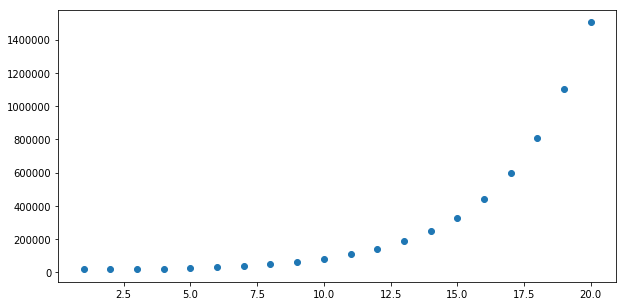

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.391459590368783], [-0.19431585503215612],...","[[559.2279862411185], [277.5940786173659], [-2...",2.122119e+04
1,2,"[[-0.13518256567199927], [-1.0241678809103787]...","[[-366.1100352811196], [1185.5028941117466], [...",1.805279e+04
2,3,"[[-0.6207872629235358], [0.4280945342161462], ...","[[693.7209960736237], [-2074.660593037893], [-...",1.952447e+04
3,4,"[[-0.1264625237947512], [-1.6107183634462023],...","[[-706.1781987554066], [2912.5898538033553], [...",2.250745e+04
4,5,"[[-0.6039732070216578], [1.0466133602482293], ...","[[682.1581188955809], [-3796.188176706331], [-...",2.684265e+04
5,6,"[[-0.18997095570018524], [-2.3488618910769015]...","[[-591.4317876021037], [4850.678930464473], [5...",3.273980e+04
6,7,"[[-0.49258898374407334], [1.9528425180289188],...","[[432.31146863412584], [-6145.292013008315], [...",4.061022e+04
7,8,"[[-0.36638622601403237], [-3.4844241775009914]...","[[-180.2896539000585], [7767.523850757015], [9...",5.106388e+04
8,9,"[[-0.22565297154435784], [3.3908586350643315],...","[[-201.04750638524933], [-9821.832589379033], ...",6.495572e+04
9,10,"[[-0.7616615456328608], [-5.320416230802426], ...","[[765.7265344121472], [12444.678379809653], [1...",8.346699e+04


In [16]:
T_3, i_3, nor_3 = GD(y,w_nulo,x,tol=0.001102,epochs=20,lr=0.0007)
T_3

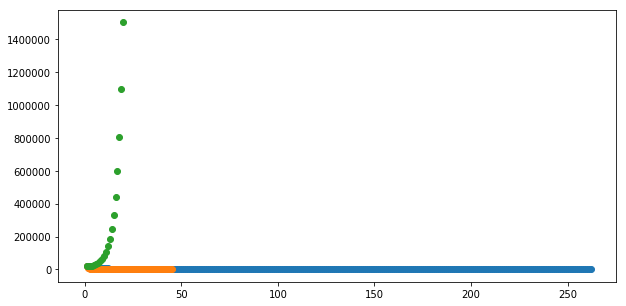

In [17]:
## Gráfica 
fig  = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(i_1,nor_1)
ax1.scatter(i_2,nor_2)
ax1.scatter(i_3,nor_3)
plt.show()

# Parte 3: SGD

# Parte 4: MBGD

In [20]:
batch_size = 32
batch_size 

32

In [21]:
batches = int(x.shape[0] / batch_size)
batches

31

In [23]:
def MBGD(ye,w,equis,batch_size,tol=0.1,epochs=20,lr=0.1):
    
    unos = np.ones_like(y)
    features = np.hstack((equis,unos))
    
    nor_gradiente = 100
    i = 0 
    
    iteracion_k = []
    w_k = []
    pk = []
    norma_k = []
    
    cur_w = w
    
    batches = int(equis.shape[0] / batch_size) 
    
    while nor_gradiente > tol and i < epochs:
        
        for j in range(batches):
     
            prev_w = cur_w
        
            features_j = features[j:j+batch_size]
            ye_j = ye[j:j+batch_size] 
        
            ## Gradiente descendente
            cur_w = cur_w - (lr * (-2 * np.matmul(features_j.T,ye_j) + 2 * np.matmul(np.matmul(features_j.T,features_j),prev_w)))
    
            ## Calculando el valor del grandiente
            gradiente = -2 * np.matmul(features_j.T,ye_j) + 2 * np.matmul(np.matmul(features_j.T,features_j),prev_w)
        
            ## Calculando la norma del gradiente         
            nor_gradiente = np.linalg.norm(gradiente)
        
        i = i+1
            
        iteracion_k.append(i)
        w_k.append(cur_w)
        pk.append(gradiente) 
        norma_k.append(nor_gradiente)

    

        #print("Iteracion: ", i)
        #print("x_inicial: ", x_inicial)
        #print("gradiente: ", gradiente)
            
    print("Norma del Gradiente: ", nor_gradiente)
    print("Forma del gradiente: ", gradiente.shape)
    
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(iteracion_k,norma_k)
    plt.show()
        
    
    TableOut = pd.DataFrame({'Iteración k':iteracion_k, 'W_k':w_k, 'Dirección': pk, 'Norma': norma_k})
    return TableOut, iteracion_k, norma_k 
    print(gradiente.shape)

# batches de tamaño 25 step sizes: 0.0005, 0.005 y 0.01

Norma del Gradiente:  22.687025513675295
Forma del gradiente:  (101, 1)


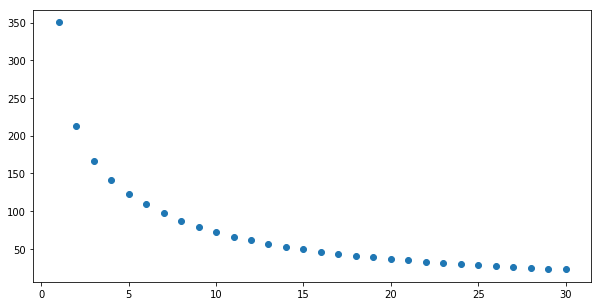

,Iteración k,W_k,Dirección,Norma
0,1,"[[0.13467068819459824], [-0.17122637586670292]...","[[-7.207280830258682], [-16.713092315775725], ...",350.209583
1,2,"[[0.41136982570939606], [-0.29605879630729304]...","[[2.1371126757322827], [-20.0418927409358], [3...",213.042096
2,3,"[[0.49960384792181817], [-0.3401938155755542],...","[[6.163895872995823], [-20.241627098390083], [...",166.754258
3,4,"[[0.517292737216201], [-0.34919224102825946], ...","[[7.3948158670655815], [-19.07626866231314], [...",141.377317
4,5,"[[0.5083284097292263], [-0.34434469558891434],...","[[7.43287655087704], [-17.511207223155118], [4...",123.250162
5,6,"[[0.48977325423432255], [-0.33459966657143037]...","[[6.999349484198667], [-15.895889596049017], [...",108.934648
6,7,"[[0.4685667901687521], [-0.32359966527503403],...","[[6.407025837366213], [-14.358247876210584], [...",97.209577
7,8,"[[0.4475899994132647], [-0.31281146917296115],...","[[5.788322539902097], [-12.944707813773142], [...",87.444464
8,9,"[[0.428012861304036], [-0.3028015898713505], [...","[[5.19741401908481], [-11.668582285395622], [3...",79.224956
9,10,"[[0.41025456580082176], [-0.29375544658924524]...","[[4.6546197409623105], [-10.528469906100135], ...",72.246499


In [26]:
T_7, i_7, nor_7 = MBGD(y,w_nulo,x,25,tol=0.001102,epochs=30,lr=0.0005)
T_7

Norma del Gradiente:  0.10525093626531691
Forma del gradiente:  (101, 1)


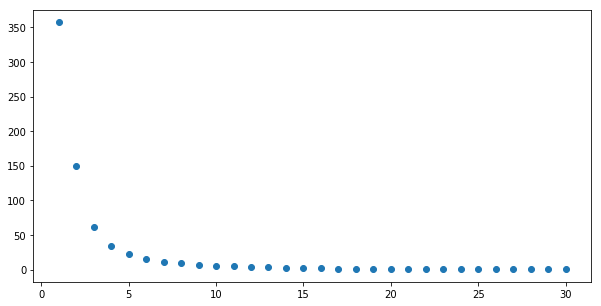

,Iteración k,W_k,Dirección,Norma
0,1,"[[0.4818352969956353], [-0.4115085516376324], ...","[[-38.93682665326055], [-14.420230831243096], ...",357.173828
1,2,"[[0.4504325084609325], [-0.4044048051020351], ...","[[-13.908795469250634], [-6.594728888172803], ...",150.216944
2,3,"[[0.37805035425794803], [-0.3367586746893413],...","[[-4.836380208062195], [-1.827339484554301], [...",61.652579
3,4,"[[0.33939256193888634], [-0.2965691384124828],...","[[-2.6581292197023885], [0.4815849119516642], ...",34.624004
4,5,"[[0.32089223467739375], [-0.2787190303393065],...","[[-1.546775049686829], [1.1758335876453145], [...",21.936058
5,6,"[[0.31248473052009806], [-0.27079254878535547]...","[[-0.9289382543423272], [1.309879904423525], [...",15.196753
6,7,"[[0.3092594664335016], [-0.2674762991583511], ...","[[-0.5905565870742038], [1.2393362982556582], ...",11.251553
7,8,"[[0.30862184479712856], [-0.2664051343827388],...","[[-0.40606803877678743], [1.0996808532851716],...",8.690005
8,9,"[[0.3092053130856035], [-0.2664396066625665], ...","[[-0.3026873825113938], [0.9458505266962405], ...",6.869016
9,10,"[[0.31029774983537467], [-0.26700154563873574]...","[[-0.24125140468612472], [0.8002738385382031],...",5.497933


In [27]:
T_8, i_8, nor_8 = MBGD(y,w_nulo,x,25,tol=0.001102,epochs=30,lr=0.005)
T_8

Norma del Gradiente:  nan
Forma del gradiente:  (101, 1)


C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in matmul


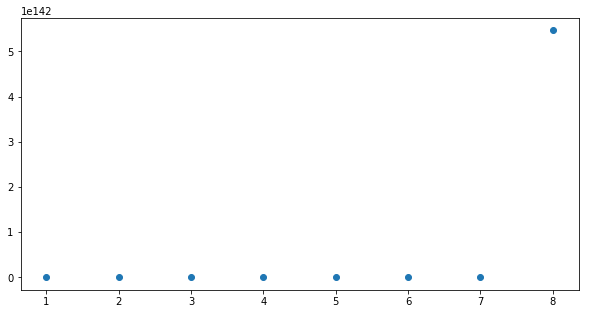

,Iteración k,W_k,Dirección,Norma
0,1,"[[-4.18229230972155e+17], [1.2599941811297318e...","[[5.470142371544941e+19], [-1.553112058406404e...",3.710942e+20
1,2,"[[-1.2282165812784146e+35], [3.921705613124221...","[[1.6088285713397403e+37], [-4.908639641575662...",1.088912e+38
2,3,"[[-3.4690916955674164e+52], [1.111975011582082...","[[4.544544318487815e+54], [-1.3930702773218697...",3.076138e+55
3,4,"[[-9.776757403197805e+69], [3.1345762223230083...","[[1.2807721617381643e+72], [-3.927183192453401...",8.669412e+72
4,5,"[[-2.754952186211726e+87], [8.832926158642248e...","[[3.6090363886180785e+89], [-1.106645298940180...",2.442919e+90
5,6,"[[-7.76299949756048e+104], [2.488974803882316e...","[[1.016966771124387e+107], [-3.118346986581341...",6.883743e+107
6,7,"[[-2.187483657552642e+122], [7.013515882228005...","[[2.865642585567616e+124], [-8.786981845098679...",1.939724e+125
7,8,"[[-6.163963546817468e+139], [1.976291628152592...","[[8.07490212609796e+141], [-2.4760247162153904...",5.465818e+142
8,9,"[[-1.7369019601961422e+157], [5.56885967538638...","[[2.2753725301520998e+159], [-6.97702403921700...",inf
9,10,"[[-4.894299578550869e+174], [1.569211630088992...","[[6.411619694479369e+176], [-1.966008824782689...",inf


In [28]:
T_9, i_9, nor_9 = MBGD(y,w_nulo,x,25,tol=0.001102,epochs=30,lr=0.01)
T_9

# batches de tamaño 50 step sizes: 0.0005, 0.005 y 0.01

Norma del Gradiente:  26.613514085087903
Forma del gradiente:  (101, 1)


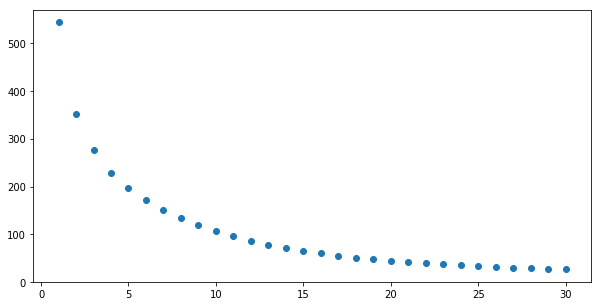

,Iteración k,W_k,Dirección,Norma
0,1,"[[0.24816670242290761], [-0.1995454784526861],...","[[-18.176883447480407], [58.3709987008192], [6...",543.549906
1,2,"[[0.4270184847708533], [-0.3239221207974727], ...","[[-0.8125838508998413], [30.758366245355575], ...",352.851143
2,3,"[[0.45841805066716435], [-0.3532221428919865],...","[[7.117021543879389], [20.079138475979928], [2...",275.913455
3,4,"[[0.44261636123027764], [-0.3501243877906051],...","[[9.71322174742508], [15.481017532340285], [15...",229.353943
4,5,"[[0.4133214228867705], [-0.33700321389552684],...","[[10.318531814650328], [13.152710003821817], [...",196.363854
5,6,"[[0.3817432818511001], [-0.3220473916053256], ...","[[10.179860191042053], [11.752984922280659], [...",170.953349
6,7,"[[0.35166394434992165], [-0.3082175895203824],...","[[9.772830792061768], [10.769651351550355], [7...",150.407887
7,8,"[[0.3242525488151533], [-0.29644867488826493],...","[[9.289619255755582], [9.991487546760364], [6....",133.314475
8,9,"[[0.29970629858678877], [-0.2868725099318094],...","[[8.809379173217678], [9.325642089311073], [5....",118.847166
9,10,"[[0.27785816416317044], [-0.2793135411111583],...","[[8.362811643271925], [8.7292948364273], [4.41...",106.471270


In [29]:
T_10, i_10, nor_10 = MBGD(y,w_nulo,x,50,tol=0.001102,epochs=30,lr=0.0005)
T_10

Norma del Gradiente:  1.3971446277898048e+127
Forma del gradiente:  (101, 1)


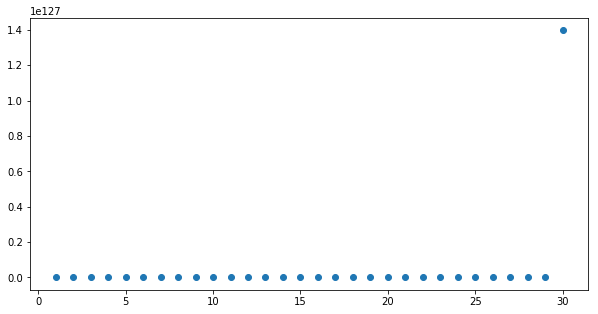

,Iteración k,W_k,Dirección,Norma
0,1,"[[347.95548242951133], [-341.6858627874915], [...","[[-116005.51187962104], [100043.33674857691], ...",1.260963e+06
1,2,"[[3606897.077832154], [-3048365.74499577], [-1...","[[-1208305701.4515622], [863516970.3672982], [...",1.298046e+10
2,3,"[[37395552999.66359], [-30853027514.811516], [...","[[-12518129994301.053], [8726010888040.504], [...",1.331756e+14
3,4,"[[389173990206494.9], [-311146778378431.2], [-...","[[-1.300789958277138e+17], [8.795770174159165e...",1.363018e+18
4,5,"[[4.0838058432428467e+18], [-3.091312153012353...","[[-1.3615106875687048e+21], [8.731898392734989...",1.390450e+22
5,6,"[[4.345012649448235e+22], [-2.985687733378965e...","[[-1.4425233182916229e+25], [8.420860456745508...",1.411345e+26
6,7,"[[4.727143837408188e+26], [-2.7257268893794725...","[[-1.5589298497595525e+29], [7.663594573923468...",1.423203e+30
7,8,"[[5.322405743825748e+30], [-2.188681753461282e...","[[-1.7376172568029116e+33], [6.105328243437863...",1.429510e+34
8,9,"[[6.295051943611025e+34], [-1.1557462372548591...","[[-2.0264781889952275e+37], [3.113660887013496...",1.462649e+38
9,10,"[[7.937730320337349e+38], [7.630747135760217e+...","[[-2.5108391478804233e+41], [-2.43858042196243...",1.651564e+42


In [30]:
T_11, i_11, nor_11 = MBGD(y,w_nulo,x,50,tol=0.001102,epochs=30,lr=0.005)
T_11

Norma del Gradiente:  nan
Forma del gradiente:  (101, 1)


C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in multiply
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in matmul
C:\Users\Johnatan\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in matmul


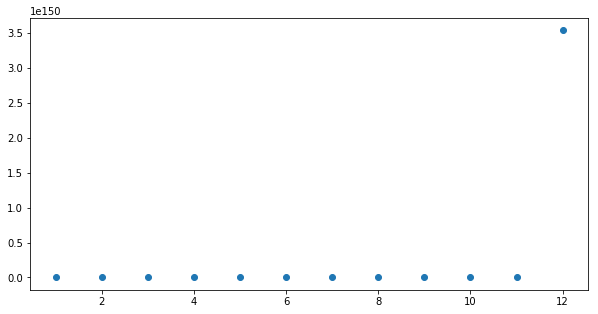

,Iteración k,W_k,Dirección,Norma
0,1,"[[66012522921.20376], [-75050926255.78818], [4...","[[-8266479264738.26], [9111497967183.652], [-5...",8.877533e+13
1,2,"[[1.4849731692779233e+23], [-1.148489701365441...","[[-1.858729840100528e+25], [1.3633401646430858...",2.050439e+26
2,3,"[[3.69680841323604e+35], [-2.564990812456462e+...","[[-4.620361114973181e+37], [3.0366658405853486...",4.914340e+38
3,4,"[[9.259209400944026e+47], [-5.78239597420013e+...","[[-1.1546926195954168e+50], [6.839758951551395...",1.172957e+51
4,5,"[[2.351635437649528e+60], [-1.2557472527455424...","[[-2.9238832902895384e+62], [1.483586385438942...",2.790148e+63
5,6,"[[6.088350956924694e+72], [-2.5324550217056654...","[[-7.540171452044935e+74], [2.9849696692559466...",6.629160e+75
6,7,"[[1.61550178076242e+85], [-4.3349183617553895e...","[[-1.9908682837584153e+87], [5.079846653895951...",1.586011e+88
7,8,"[[4.416856848959605e+97], [-4.1296288860462084...","[[-5.411184937089289e+99], [4.6903951205738996...",3.905729e+100
8,9,"[[1.2497616660380208e+110], [1.258364295900742...","[[-1.5210713481412577e+112], [-1.5635230231732...",1.032510e+113
9,10,"[[3.6687695408899336e+122], [1.106349299955639...","[[-4.43473733782561e+124], [-1.336778896261497...",3.054917e+125


In [31]:
T_12, i_12, nor_12 = MBGD(y,w_nulo,x,50,tol=0.001102,epochs=30,lr=0.01)
T_12

# batches de tamaño 100 step sizes: 0.0005, 0.005 y 0.01

Norma del Gradiente:  33.64340965396956
Forma del gradiente:  (101, 1)


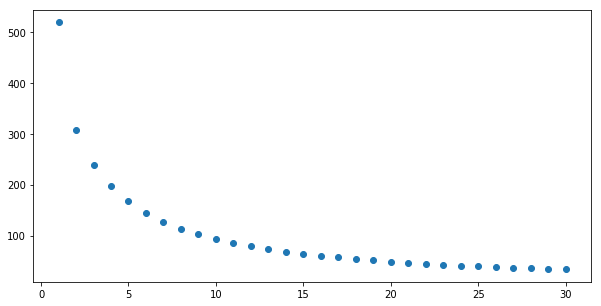

,Iteración k,W_k,Dirección,Norma
0,1,"[[-0.11215436042624714], [-0.2730542789840438]...","[[30.589089679174485], [31.21429351825759], [-...",518.875034
1,2,"[[-0.17460366412289213], [-0.4337626265836301]...","[[33.71028260169229], [-2.312017274799473], [-...",307.021718
2,3,"[[-0.21946062178064515], [-0.4624034347210298]...","[[28.79206061576003], [-11.682209381015525], [...",238.850162
3,4,"[[-0.24776642423825868], [-0.45356713158589984...","[[24.38268204110838], [-12.270814198627924], [...",197.157830
4,5,"[[-0.2659144960415891], [-0.43653343744238665]...","[[21.08750251701696], [-10.712770253551405], [...",167.225887
5,6,"[[-0.2781026104314638], [-0.4195334406242799],...","[[18.661831705264035], [-8.891717732719727], [...",144.693459
6,7,"[[-0.2867644446426511], [-0.404625121763827], ...","[[16.845984475733772], [-7.276299670209923], [...",127.283026
7,8,"[[-0.2932954999483563], [-0.3920625575445229],...","[[15.4513969135052], [-5.9409273124346385], [-...",113.526754
8,9,"[[-0.2985045383474137], [-0.38159886994505626]...","[[14.350436977608602], [-4.859128808175214], [...",102.425515
9,10,"[[-0.3028676973153414], [-0.3728825324606172],...","[[13.457707799790349], [-3.9857157267967978], ...",93.288711


In [32]:
T_13, i_13, nor_13 = MBGD(y,w_nulo,x,100,tol=0.001102,epochs=30,lr=0.0005)
T_13

Norma del Gradiente:  3.341585310872337e+141
Forma del gradiente:  (101, 1)


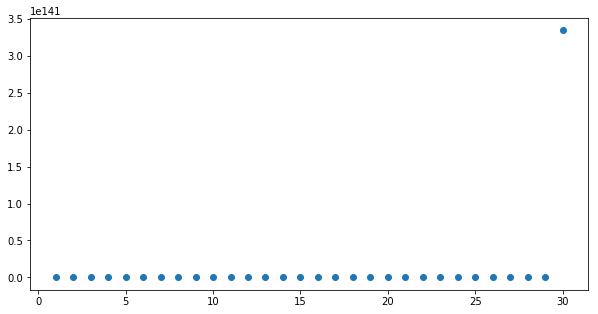

,Iteración k,W_k,Dirección,Norma
0,1,"[[5821.564518692141], [-2075.0401651262696], [...","[[-1548235.7559661383], [537672.3280028128], [...",1.384141e+07
1,2,"[[228272148.218908], [-80004264.4152277], [-11...","[[-60436814722.50847], [19904523463.785374], [...",5.919598e+11
2,3,"[[9736334805861.342], [-3422358412286.539], [-...","[[-2576904668525725.5], [850005383110097.2], [...",2.549065e+16
3,4,"[[4.188363698052648e+17], [-1.470552933921586e...","[[-1.1085269705514107e+20], [3.651634367959794...",1.097391e+21
4,5,"[[1.803021771557342e+22], [-6.327842850632637e...","[[-4.7720444336377937e+24], [1.571245023190224...",4.724353e+25
5,6,"[[7.76216939958145e+26], [-2.7239269971052014e...","[[-2.0544097152630433e+29], [6.763631875240337...",2.033883e+30
6,7,"[[3.3416994452316544e+31], [-1.172657266962679...","[[-8.844462029053417e+33], [2.911755316353645e...",8.756090e+34
7,8,"[[1.438638987829453e+36], [-5.048401319842619e...","[[-3.80763998467344e+38], [1.2535380300430567e...",3.769595e+39
8,9,"[[6.193501915184553e+40], [-2.1733917197178923...","[[-1.6392316571836782e+43], [5.396617354306371...",1.622853e+44
9,10,"[[2.666371919782123e+45], [-9.356693436701785e...","[[-7.057075830360147e+47], [2.3233038564905827...",6.986562e+48


In [33]:
T_14, i_14, nor_14 = MBGD(y,w_nulo,x,100,tol=0.001102,epochs=30,lr=0.005)
T_14

Norma del Gradiente:  inf
Forma del gradiente:  (101, 1)


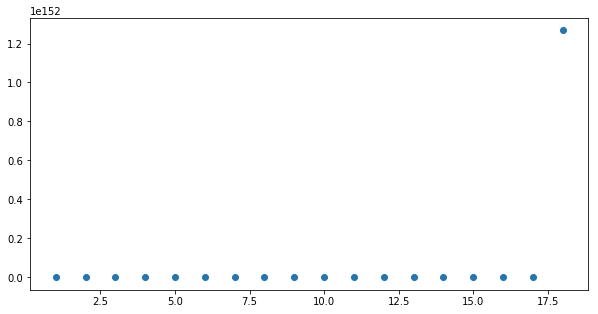

,Iteración k,W_k,Dirección,Norma
0,1,"[[29643697.365218237], [-11119475.638244985], ...","[[-3386226228.561117], [1269903644.244213], [1...",2.943640e+10
1,2,"[[5672530805867954.0], [-1864257211682502.2], ...","[[-6.469382519542734e+17], [2.0649951524143104...",6.194903e+18
2,3,"[[1.1946544846915905e+24], [-3.937866947087905...","[[-1.3620469287415904e+26], [4.351539558803154...",1.330770e+27
3,4,"[[2.5591809997217338e+32], [-8.424603347851253...","[[-2.917716783178064e+34], [9.307066063532588e...",2.857816e+35
4,5,"[[5.494053953361573e+40], [-1.8069472616298122...","[[-6.263772817239796e+42], [1.9961082738819278...",6.136928e+43
5,6,"[[1.1797748881590006e+49], [-3.878955988549615...","[[-1.3450633716631907e+51], [4.284965101941866...",1.317865e+52
6,7,"[[2.533491282154834e+57], [-8.329065290269374e...","[[-2.8884388047090316e+59], [9.200833014512803...",2.830038e+60
7,8,"[[5.440532249656974e+65], [-1.7885788162421914...","[[-6.202763002237762e+67], [1.975779981640428e...",6.077351e+68
8,9,"[[1.1683247108737258e+74], [-3.840853148437776...","[[-1.3320096520753063e+76], [4.242854191472071...",1.305078e+77
9,10,"[[2.5089138902790484e+82], [-8.248011676322937...","[[-2.8604184326911778e+84], [9.111285366784019...",2.802584e+85


In [34]:
T_15, i_15, nor_15 = MBGD(y,w_nulo,x,100,tol=0.001102,epochs=30,lr=0.01)
T_15

# Parte 5: Comparación

In [54]:
unos = np.ones_like(y)
unos.shape


(1000, 1)

In [65]:
np.hstack((x,unos)).shape

(1000, 101)